In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [3]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
numpy.random.seed(48)

In [5]:
data_raw = read_csv('airline_dataset.csv', usecols=[1], engine='python', skipfooter=3)

data = data_raw.values.astype("float32")

In [6]:
data_raw.tail()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,606
140,508
141,461
142,390
143,432


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [8]:
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

========================================================================================================================

In [9]:
look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [10]:
[ x.shape for x in (X_train, Y_train, X_test, Y_test) ]

[(92, 3), (92,), (44, 3), (44,)]

In [11]:
X_train[:3]

array([[0.01544401, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853]], dtype=float32)

In [12]:
#[samples, time steps, features]
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
[ x.shape for x in (X_train, Y_train, X_test, Y_test) ]

[(92, 1, 3), (92,), (44, 1, 3), (44,)]

In [14]:
X_train[:3]

array([[[0.01544401, 0.02702703, 0.05405405]],

       [[0.02702703, 0.05405405, 0.04826255]],

       [[0.05405405, 0.04826255, 0.03281853]]], dtype=float32)

In [15]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 6s - loss: 0.0665
Epoch 2/100
 - 1s - loss: 0.0284
Epoch 3/100
 - 1s - loss: 0.0175
Epoch 4/100
 - 1s - loss: 0.0147
Epoch 5/100
 - 1s - loss: 0.0129
Epoch 6/100
 - 1s - loss: 0.0113
Epoch 7/100
 - 1s - loss: 0.0098
Epoch 8/100
 - 1s - loss: 0.0084
Epoch 9/100
 - 1s - loss: 0.0074
Epoch 10/100
 - 1s - loss: 0.0062
Epoch 11/100
 - 1s - loss: 0.0055
Epoch 12/100
 - 1s - loss: 0.0048
Epoch 13/100
 - 1s - loss: 0.0043
Epoch 14/100
 - 1s - loss: 0.0040
Epoch 15/100
 - 1s - loss: 0.0038
Epoch 16/100
 - 1s - loss: 0.0036
Epoch 17/100
 - 1s - loss: 0.0035
Epoch 18/100
 - 1s - loss: 0.0034
Epoch 19/100
 - 1s - loss: 0.0033
Epoch 20/100
 - 1s - loss: 0.0034
Epoch 21/100
 - 1s - loss: 0.0031
Epoch 22/100
 - 1s - loss: 0.0031
Epoch 23/100
 - 1s - loss: 0.0031
Epoch 24/100
 - 1s - loss: 0.0030
Epoch 25/100
 - 1s - loss: 0.0031
Epoch 26/100
 - 1s - loss: 0.0030
Epoch

In [16]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [17]:
[ x.shape for x in (pred_train, Y_train, pred_test, Y_test) ]

[(92, 1), (92,), (44, 1), (44,)]

In [18]:
pred_train = scaler.inverse_transform(pred_train)
Y_train = scaler.inverse_transform([Y_train])
pred_test = scaler.inverse_transform(pred_test)
Y_test = scaler.inverse_transform([Y_test])

In [19]:
score_train = math.sqrt(mean_squared_error(Y_train[0], pred_train[:,0]))
print('Train Score: %.2f RMSE' % (score_train))
score_test = math.sqrt(mean_squared_error(Y_test[0], pred_test[:,0]))
print('Test Score: %.2f RMSE' % (score_test))

Train Score: 20.91 RMSE
Test Score: 57.95 RMSE


In [20]:
pred_train_plot = numpy.empty_like(data)
pred_train_plot[:, :] = numpy.nan
pred_train_plot[look_back:len(pred_train)+look_back, :] = pred_train

pred_test_plot = numpy.empty_like(data)
pred_test_plot[:, :] = numpy.nan
pred_test_plot[len(pred_train)+(look_back*2)+1:len(data)-1, :] = pred_test

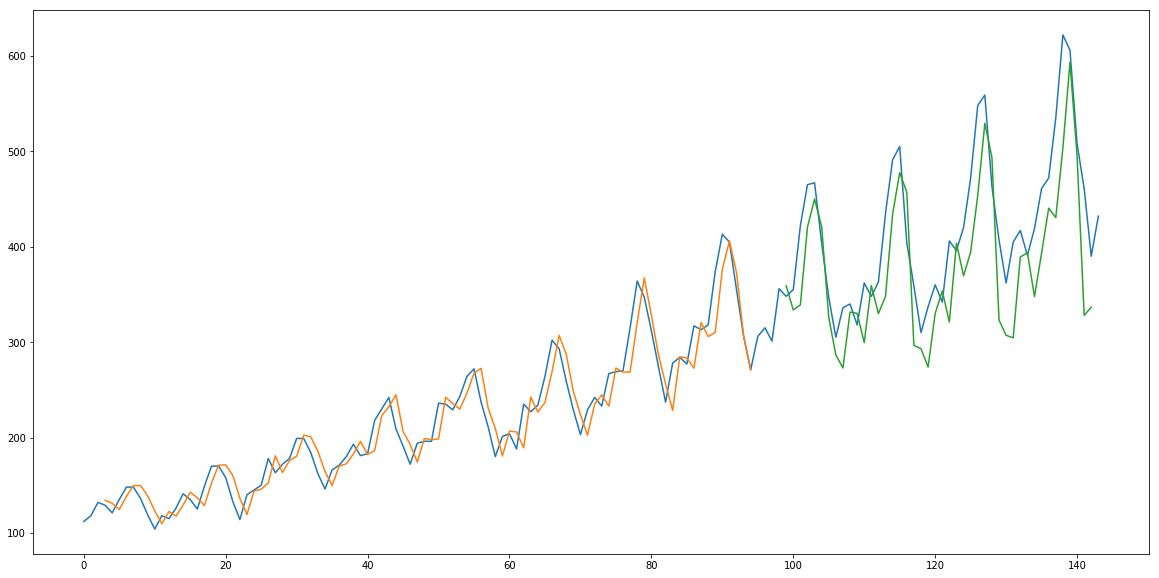

In [21]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(data))
plt.plot(pred_train_plot)
plt.plot(pred_test_plot)
plt.show()

========================================================================================================================

In [22]:
look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [23]:
[ x.shape for x in (X_train, Y_train, X_test, Y_test) ]

[(92, 3), (92,), (44, 3), (44,)]

In [24]:
X_train[:3]

array([[0.01544401, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853]], dtype=float32)

In [25]:
#[samples, time steps, features]
X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
[ x.shape for x in (X_train, Y_train, X_test, Y_test) ]

[(92, 3, 1), (92,), (44, 3, 1), (44,)]

In [27]:
X_train[:3]

array([[[0.01544401],
        [0.02702703],
        [0.05405405]],

       [[0.02702703],
        [0.05405405],
        [0.04826255]],

       [[0.05405405],
        [0.04826255],
        [0.03281853]]], dtype=float32)

In [28]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0272
Epoch 2/100
 - 2s - loss: 0.0121
Epoch 3/100
 - 2s - loss: 0.0102
Epoch 4/100
 - 2s - loss: 0.0089
Epoch 5/100
 - 2s - loss: 0.0077
Epoch 6/100
 - 2s - loss: 0.0067
Epoch 7/100
 - 2s - loss: 0.0059
Epoch 8/100
 - 2s - loss: 0.0052
Epoch 9/100
 - 2s - loss: 0.0047
Epoch 10/100
 - 2s - loss: 0.0044
Epoch 11/100
 - 2s - loss: 0.0041
Epoch 12/100
 - 2s - loss: 0.0040
Epoch 13/100
 - 2s - loss: 0.0038
Epoch 14/100
 - 2s - loss: 0.0038
Epoch 15/100
 - 2s - loss: 0.0037
Epoch 16/100
 - 2s - loss: 0.0037
Epoch 17/100
 - 2s - loss: 0.0037
Epoch 18/100
 - 2s - loss: 0.0037
Epoch 19/100
 - 2s - loss: 0.0037
Epoch 20/100
 - 2s - loss: 0.0036
Epoch 21/100
 - 2s - loss: 0.0037
Epoch 22/100
 - 2s - loss: 0.0036
Epoch 23/100
 - 2s - loss: 0.0036
Epoch 24/100
 - 2s - loss: 0.0035
Epoch 25/100
 - 2s - loss: 0.0036
Epoch 26/100
 - 2s - loss: 0.0036
Epoch 27/100
 - 2s - loss: 0.0036
Epoch 28/100
 - 2s - loss: 0.0036
Epoch 29/100
 - 2s - loss: 0.0035
Epoch 30/100
 - 2s - lo

In [29]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [30]:
[ x.shape for x in (pred_train, Y_train, pred_test, Y_test) ]

[(92, 1), (92,), (44, 1), (44,)]

In [31]:
pred_train = scaler.inverse_transform(pred_train)
Y_train = scaler.inverse_transform([Y_train])
pred_test = scaler.inverse_transform(pred_test)
Y_test = scaler.inverse_transform([Y_test])

In [32]:
score_train = math.sqrt(mean_squared_error(Y_train[0], pred_train[:,0]))
print('Train Score: %.2f RMSE' % (score_train))
score_test = math.sqrt(mean_squared_error(Y_test[0], pred_test[:,0]))
print('Test Score: %.2f RMSE' % (score_test))

Train Score: 25.33 RMSE
Test Score: 64.98 RMSE


In [33]:
pred_train_plot = numpy.empty_like(data)
pred_train_plot[:, :] = numpy.nan
pred_train_plot[look_back:len(pred_train)+look_back, :] = pred_train

pred_test_plot = numpy.empty_like(data)
pred_test_plot[:, :] = numpy.nan
pred_test_plot[len(pred_train)+(look_back*2)+1:len(data)-1, :] = pred_test

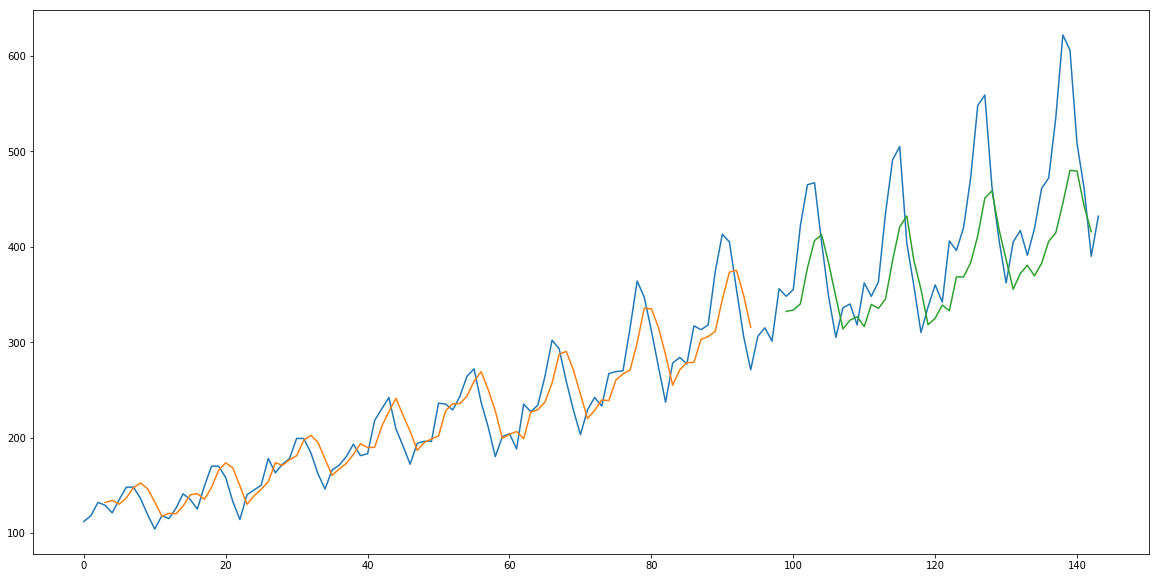

In [34]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(data))
plt.plot(pred_train_plot)
plt.plot(pred_test_plot)
plt.show()

========================================================================================================================